# Limpieza de datos

En este notebook realizaremos la limpieza de datos para detectar y tratar valores atipicos y faltantes en caso de que existan y tambien crearemos nuevas columas (Feature Engineering) en caso de ser necesario

In [2]:
# Cargamos las librerias y damos un primer vistazo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_wine = pd.read_csv("dataset/red_wine.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### ¿ Hay valores faltantes o nulos en nuestro dataset ?

Para averiguar esto usaremos los metodos .info() y .isnull().sum() y veamos que resultados nos arrojan

In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Verificamos si hay valores nulos en cada columna
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Gracias al codigo anterior sabemos que:

1. Todas las variables del dataset salvo quality (es numerica de momento) son cuantitativas continuas
2. Ya que todas las columnas tienen un Non-Null Count de 1599, que coincide con el número total de filas del dataset. Esto confirma que no hay valores nulos o faltantes en nuestro dataset.

Ahora hagamos un resumen estadístico de las variables de nuestro dataset (todas son numericas) y para ello usaremos el metodo .describe

In [5]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Ahora estudiemos las cantidades de vinos que tenemos acorde a una calidad deteminada y ordenemoslo segun las cantidades que existan en el dataset

In [6]:
df_wine["quality"].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Dado el resultado anterior y dada a la informacion que tenemos del negocio sabemos que un vino que tenga una calidad de 6 o mas sera un vino de calidad mientras que si su calidad es menor a 6 no es un vino de calidad es por ello que para simplicar la informacion de de cara a la creacion de un modelo de machine learnig pasaremos a tener una columna de calidad en binario donde:

- Si quality >= 6 es un vino de calidad 
- Si quality < 6 no es un vino de calidad


In [7]:
# Paso 1: Definir la función para la clasificación binaria
# Esta función asignará 1 si la calidad es 6 o superior, y 0 en caso contrario.
def convertir_a_binario(calidad):
    if calidad >= 6:
        return 1  # Vino de calidad superior
    else:
        return 0  # Vino de calidad inferior/media

# Paso 2: Crear la nueva columna 'quality_binary' aplicando la función
df_wine['quality_binary'] = df_wine['quality'].apply(convertir_a_binario)

# Opcional: Una forma más compacta de hacerlo usando una expresión lambda
# df_wine['quality_binary'] = df_wine['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Paso 3: Verificar la distribución de las nuevas clases
print("Distribución de las clases binarias:")
print(df_wine['quality_binary'].value_counts())

# Paso 4: Mostrar las primeras filas para ver la nueva columna
print("\nDataFrame con la nueva columna 'quality_binary':")
df_wine.head()

Distribución de las clases binarias:
quality_binary
1    855
0    744
Name: count, dtype: int64

DataFrame con la nueva columna 'quality_binary':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Ahora eliminaremos la columna quality ya que ahora la información de la variable objetivo está contenida en quality_binary, lo que evita la redundancia y un posible "data leakage" (fuga de información) para el modelo futuro que vayamos a crear

In [8]:
# Eliminamos la columna 'quality' ya que ahora usaremos 'quality_binary'
df_wine = df_wine.drop('quality', axis=1)

# Verificamos las columnas restantes
print("Columnas restantes en el DataFrame:")
print(df_wine.columns)

Columnas restantes en el DataFrame:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_binary'],
      dtype='object')


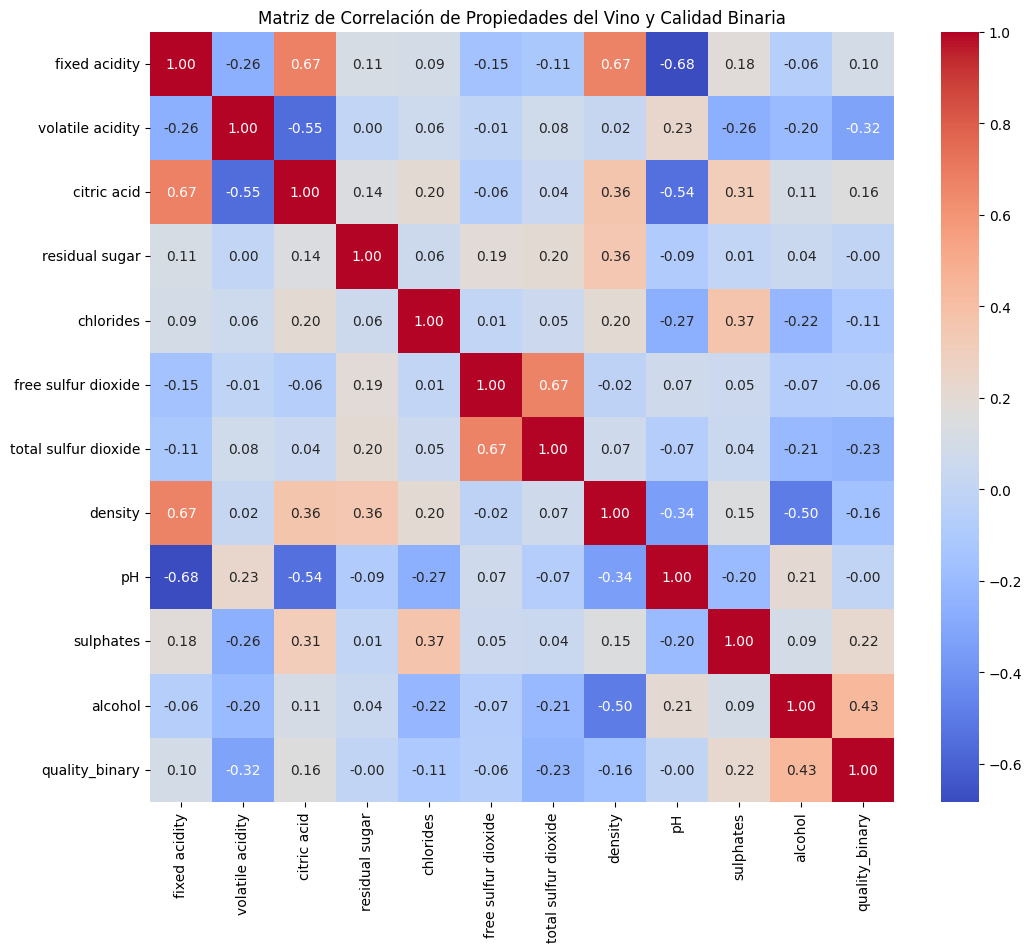

In [9]:
# Calculamos la matriz de correlación
corr_matrix = df_wine.corr()

# Creamos el heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Propiedades del Vino y Calidad Binaria')
plt.show()

#### Resumen de matriz de correlacion

| Variable                | Correlación con calidad_binary | Interpretación                                                                 |
|-------------------------|-------------------------------|-------------------------------------------------------------------------------|
| fixed acidity           | 0.124                         | Relación positiva débil; no es determinante para la calidad                   |
| volatile acidity        | -0.391                        | Relación negativa moderada; valores altos suelen asociarse a menor calidad    |
| citric acid             | 0.226                         | Relación positiva débil; puede influir ligeramente en la calidad              |
| residual sugar          | 0.014                         | Relación casi nula; no influye en la calidad                                  |
| chlorides               | -0.129                        | Relación negativa débil; valores altos pueden indicar menor calidad           |
| free sulfur dioxide     | -0.051                        | Relación negativa muy débil; poca influencia                                  |
| total sulfur dioxide    | -0.185                        | Relación negativa débil; valores altos pueden asociarse a menor calidad       |
| density                 | -0.175                        | Relación negativa débil; densidad mayor suele asociarse a menor calidad       |
| pH                      | -0.058                        | Relación negativa muy débil; poca influencia                                  |
| sulphates               | 0.251                         | Relación positiva débil; valores altos pueden indicar mejor calidad           |
| alcohol                 | 0.476                         | Relación positiva moderada; mayor alcohol suele asociarse a mejor calidad     |

**Nota:** Los valores cercanos a 0 indican poca o ninguna relación, mientras que valores más alejados de 0 (positivos o negativos) indican mayor influencia sobre la calidad del vino. La variable con mayor correlación positiva es el alcohol.

Ahora tras todas las modificaciones anteriormente realizadas guardaremos el dataset para pasar a la siguiente fase del proyecto

In [10]:
# Guarda el DataFrame modificado en el archivo 'wine_ready.csv'
# con la nueva columna 'quality_binary' y sin el índice
df_wine.to_csv('dataset/wine_ready.csv', index=False)